# Wine project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [5]:
data.isnull()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


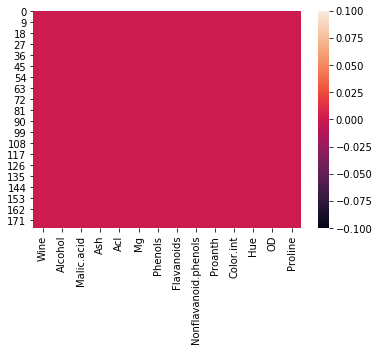

In [6]:
sns.heatmap(data.isnull())

In [7]:
print(data)

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065

In [13]:
data.drop(["Ash"], axis=1, inplace=True)

In [14]:
print(data)
x=data.drop(['Wine'],axis=1)
y=data['Wine']

     Wine  Alcohol  Malic.acid   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  15.6  127     2.80        3.06   
1       1    13.20        1.78  11.2  100     2.65        2.76   
2       1    13.16        2.36  18.6  101     2.80        3.24   
3       1    14.37        1.95  16.8  113     3.85        3.49   
4       1    13.24        2.59  21.0  118     2.80        2.69   
..    ...      ...         ...   ...  ...      ...         ...   
173     3    13.71        5.65  20.5   95     1.68        0.61   
174     3    13.40        3.91  23.0  102     1.80        0.75   
175     3    13.27        4.28  20.0  120     1.59        0.69   
176     3    13.17        2.59  20.0  120     1.65        0.68   
177     3    14.13        4.10  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28       4.38  1.05  3.40     1050  


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [21]:
logReg=LogisticRegression()
logReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred=logReg.predict(x_test)

In [23]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[19,  1,  0],
       [ 0, 20,  0],
       [ 0,  0, 14]], dtype=int64)

In [24]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9814814814814815

In [25]:
y_pred

array([1, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 1,
       3, 2, 2, 1, 3, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

